# Personality Profiles

[ short description]

---
#### Table of Contents

[EDA](#EDA)

[Feature Creation](#FEAT)

[NLP](#NLP)

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/train.csv")

<a id="EDA"> </a>

---
## EDA

In [3]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
data['posts'].loc[42]

"Painting the world with the colors of my soul. Interpret it as you like - helping others by volunteering, teaching, giving everything you have.  Personal growth - learning as much about the universe...|||6 months ago I met this ENTP guy at my university. We are in the same group, so we basically have to be together everyday, and most likely have to study together for the next 6 years. So cutting off...|||1984 all the way|||I don't like people in groups because it's harder to enslave them.|||ESxJ or ISxJ, because I've noticed that ISxJs don't have much trouble with small talk either.  I'd say ISTJ.|||secret :)|||I really like the movie, and Alice is my alter ego in internet, since people find my real name a bit weird.|||Sense of smell easily, because my sense of smell has always been kind of weak. I think it's better that way, because I don't feel and suffer from disgusting smells people seem to feel everyday. I...|||I don't think there's a certain type who would tend to do this. I thi

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 2 columns):
type     6506 non-null object
posts    6506 non-null object
dtypes: object(2)
memory usage: 101.7+ KB


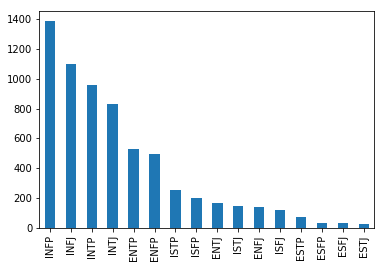

In [56]:
data['type'].value_counts().plot(kind='bar')
plt.show()

In [55]:
data['type'].value_counts()

INFP    1386
INFJ    1100
INTP     960
INTJ     830
ENTP     530
ENFP     496
ISTP     255
ISFP     198
ENTJ     167
ISTJ     145
ENFJ     143
ISFJ     124
ESTP      71
ESFP      36
ESFJ      35
ESTJ      30
Name: type, dtype: int64

In [8]:
# imbalance types

<a id="FEAT"> </a>

---
## create features


 feature | regex
 ---|---
 `?`   | `r"(\?)"`
 `!`   | `r"(!)"`
 `...` | `r"(\.\.\.)"`
 youtube | ?part of social media
 www | `r"(www)"`
 jpg/jpeg/gif | <code>r"(jpe?g&#124;gif)"</code>
 emoji `;), :tongue:, :smile: #hastags?` | `r":[a-z]*:"`
 word count   | (\w+) / 50 (length per post sample)
 word_length > 5   | `r"(\w{5,})"`
 social_media (instagram, snapchat, etc)  | [social_medai]
 ALL_CAPS  | `r"(\b[A-Z]{2,}\b)"`


In [9]:
# trial functions
# data_trial1, data_trial2, data_trial3 


In [4]:
data_trial2 = data['posts'].loc[1]

In [5]:
data_trial3 = data['posts'].loc[369]

In [6]:
data_trial1 = data['posts'].loc[42]

In [7]:
import re

In [8]:
# count question marks
def qm_count(string):
    q_mark = re.compile(r'(\?)')
    return len(re.findall(q_mark, string))
    

In [9]:
qm_count(data_trial3)

16

In [10]:
def exclaim_count(string):
    ex_mark = re.compile(r'(\!)')
    return len(re.findall(ex_mark, string))

In [11]:
exclaim_count(data_trial3)

6

In [12]:
def elipse_count(string):
    elipse = re.compile(r"(\.\.\.)")
    return len(re.findall(elipse, string))

In [13]:
elipse_count(data_trial1)

20

In [14]:
def emoji_count(string):
    emojis = re.compile(r"(:[a-z]*:)|([:;][()pdo03])",re.I)
    return len(re.findall(emojis,string))

In [15]:
emoji_count(data_trial3)

4

In [16]:
def word_count(string):
    words = re.compile(r"(\w+)")
    count = len(re.findall(words, string))
    return count/50

In [17]:
word_count(data_trial3)

31.0

In [18]:
def word_len(string):
    len5 = re.compile(r"\w{5,}")
    return len(re.findall(len5,string))/50

In [19]:
word_len(data_trial3)

9.84

In [20]:
def all_caps(string):
    mbti_type = set(data.type) # set of all mbti types
    capsloc = re.compile(r"\b[A-Z]{2,}\b")
    caps_words = [x for x in re.findall(capsloc,string) if x not in mbti_type]
    return len(caps_words)

In [21]:
all_caps(data_trial1)

6

In [22]:
def count_pix(string):
    pix = re.compile(r"\b(jpe?g|gif|png|img)\b",re.I)
    return len(re.findall(pix, string))

In [23]:
count_pix(data_trial2)

8

In [24]:
def create_features(df):
    df['questions'] = df['posts'].apply(qm_count)
    df['exclaimed'] = df['posts'].apply(exclaim_count)
    df['elipses'] = df['posts'].apply(elipse_count)
    df['emojis'] = df['posts'].apply(emoji_count)
    df['word_count'] = df['posts'].apply(word_count)
    df['big_words'] = df['posts'].apply(word_len)
    df['images'] = df['posts'].apply(count_pix)    
    df['words_all_caps'] = df['posts'].apply(all_caps) 

In [30]:
#def soc_media_count(string):
soc_media = "Twitter LinkedIn Google+ YouTube Pinterest Instagram Tumblr Flickr Reddit Snapchat WhatsApp Quora Vine Periscope\
                BizSugar StumbleUpon Delicious Digg Facebook".lower().split()

---
## Testing Feature Creation

In [25]:
test_data = data.loc[:1000]

In [26]:
test_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [29]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # ignore warning messages cluttering up view
    create_features(test_data)

In [35]:
test_data.head(10)

,type,posts,questions,exclaimed,elipses,emojis,word_count,big_words,images,words_all_caps
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,18,3,15,3,16.06,6.30,7,1
1,ENTP,'I'm finding the lack of me in these posts ver...,5,0,19,18,26.82,8.22,8,8
2,INTP,'Good one _____ https://www.youtube.com/wat...,12,4,13,10,18.66,7.34,0,3
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",11,3,26,0,23.52,7.44,0,12
4,ENTJ,'You're fired.|||That's another silly misconce...,10,1,21,3,21.88,7.78,2,13
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,10,0,39,0,31.70,10.18,0,3
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",13,3,37,9,29.02,9.96,0,15
7,INTJ,'I tend to build up a collection of things on ...,35,0,28,3,25.62,8.68,0,2
8,INFJ,"I'm not sure, that's a good question. The dist...",22,1,17,5,19.32,7.08,1,6
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,13,3,24,2,27.36,9.76,0,10


In [36]:
test_data.groupby('type').mean()

,questions,exclaimed,elipses,emojis,word_count,big_words,images,words_all_caps
type,,,,,,,,
ENFJ,9.958333,13.333333,33.708333,7.916667,26.835833,8.654167,0.708333,11.041667
ENFP,13.056338,11.901408,33.042254,6.535211,26.861690,8.481972,1.112676,8.774648
ENTJ,10.482759,8.827586,33.586207,3.827586,27.180690,8.964138,1.172414,8.482759
ENTP,10.972222,6.652778,30.486111,4.305556,25.934444,8.393611,1.208333,8.527778
ESFJ,12.750000,9.250000,21.250000,3.750000,26.100000,6.860000,1.250000,6.750000
ESFP,10.571429,17.428571,22.000000,4.714286,20.222857,6.474286,1.000000,10.142857
ESTJ,8.666667,11.333333,21.666667,2.666667,21.633333,6.573333,0.000000,8.333333
ESTP,15.181818,8.545455,24.363636,2.636364,24.489091,7.456364,0.545455,12.181818
INFJ,11.571429,9.223602,35.099379,6.236025,27.492671,8.977019,0.720497,7.478261


note:

add social media count after tokenisation

In [37]:
test_data.describe()

,questions,exclaimed,elipses,emojis,word_count,big_words,images,words_all_caps
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,11.112887,8.056943,32.435564,4.989011,26.838581,8.774226,1.083916,7.546454
std,8.313498,10.000088,14.204439,6.122000,6.121899,1.996737,2.531986,6.847050
min,0.000000,0.000000,0.000000,0.000000,0.780000,0.200000,0.000000,0.000000
25%,6.000000,2.000000,23.000000,1.000000,23.500000,7.620000,0.000000,3.000000
50%,10.000000,5.000000,32.000000,3.000000,27.760000,9.000000,0.000000,6.000000
75%,15.000000,11.000000,41.000000,7.000000,31.260000,10.200000,1.000000,10.000000
max,121.000000,97.000000,133.000000,37.000000,39.040000,13.060000,28.000000,53.000000


<a id="NLP"> </a>

---
## NLP

In [38]:
import nltk

### StopWords

In [39]:
from nltk.corpus import stopwords

In [40]:
nltk_stopwords = set(stopwords.words('english'))
len(nltk_stopwords)

179

In [41]:
my_stopwords = {'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
"aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',
'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't",
'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't",
'have', 'haven', "haven't", 'having',  'how', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its',
'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'needn',
"needn't", 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've",
'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'then', 'there', 'these',
'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',
'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with',
'won', "won't", 'wouldn', "wouldn't", 'y'}

In [42]:
print("Stopwords in nltk: {} \nMy stopword set:   {} ".format(len(nltk_stopwords),len(my_stopwords)))

Stopwords in nltk: 179 
My stopword set:   148 


In [43]:
stopwords_not_included = {'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'i', 'my', 'myself', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves',
'they', 'them', 'themselves', 'their', 'theirs', 'our', 'ours',
'ourselves', 'no', 'nor', 'not'} # undecided: 'no', 'nor', 'not'

In [44]:
print(f"{len(stopwords_not_included)} stopwords taken out")

31 stopwords taken out
